In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules
from collections import Counter
import re


In [2]:
df=pd.read_csv(r"C:\Users\shweta\Desktop\project 3 drugs n sideeffect\drugs_side_effects_drugs_com.csv")
print(df)

           drug_name medical_condition  \
0        doxycycline              Acne   
1     spironolactone              Acne   
2        minocycline              Acne   
3           Accutane              Acne   
4        clindamycin              Acne   
...              ...               ...   
2961   benzphetamine       Weight Loss   
2962    fenfluramine       Weight Loss   
2963     Fendique ER       Weight Loss   
2964        Imcivree       Weight Loss   
2965   setmelanotide       Weight Loss   

                                           side_effects  \
0     (hives, difficult breathing, swelling in your ...   
1     hives ; difficulty breathing; swelling of your...   
2     skin rash, fever, swollen glands, flu-like sym...   
3     problems with your vision or hearing; muscle o...   
4     hives ; difficult breathing; swelling of your ...   
...                                                 ...   
2961  hives ; difficulty breathing; swelling of your...   
2962  hives ; difficult

In [3]:
df.isnull().sum()

drug_name               1
medical_condition       0
side_effects          124
generic_name           44
drug_classes           83
                     ... 
Unnamed: 130         2965
Unnamed: 131         2966
Unnamed: 132         2966
Unnamed: 133         2965
Unnamed: 134         2965
Length: 135, dtype: int64

In [4]:
print('The dataset has {} rows and {}columns'.format(df.shape[0], df.shape[1]))
print("column:")
print(df.columns)

The dataset has 2966 rows and 135columns
column:
Index(['drug_name', 'medical_condition', 'side_effects', 'generic_name',
       'drug_classes', 'brand_names', 'activity', 'rx_otc',
       'pregnancy_category', 'csa',
       ...
       'Unnamed: 125', 'Unnamed: 126', 'Unnamed: 127', 'Unnamed: 128',
       'Unnamed: 129', 'Unnamed: 130', 'Unnamed: 131', 'Unnamed: 132',
       'Unnamed: 133', 'Unnamed: 134'],
      dtype='object', length=135)


In [5]:
df.drop(columns=['brand_names'], inplace=True)

In [6]:
duplicate_rows= df[df.duplicated()]

In [7]:
duplicate_count = duplicate_rows.shape[0]


print("Count of Duplicate Rows:", duplicate_count)
print(duplicate_rows) # Print the duplicate rows

Count of Duplicate Rows: 0
Empty DataFrame
Columns: [drug_name, medical_condition, side_effects, generic_name, drug_classes, activity, rx_otc, pregnancy_category, csa, alcohol, related_drugs, medical_condition_description, rating, no_of_reviews, drug_link, medical_condition_url, Unnamed: 17, Unnamed: 18, Unnamed: 19, Unnamed: 20, Unnamed: 21, Unnamed: 22, Unnamed: 23, Unnamed: 24, Unnamed: 25, Unnamed: 26, Unnamed: 27, Unnamed: 28, Unnamed: 29, Unnamed: 30, Unnamed: 31, Unnamed: 32, Unnamed: 33, Unnamed: 34, Unnamed: 35, Unnamed: 36, Unnamed: 37, Unnamed: 38, Unnamed: 39, Unnamed: 40, Unnamed: 41, Unnamed: 42, Unnamed: 43, Unnamed: 44, Unnamed: 45, Unnamed: 46, Unnamed: 47, Unnamed: 48, Unnamed: 49, Unnamed: 50, Unnamed: 51, Unnamed: 52, Unnamed: 53, Unnamed: 54, Unnamed: 55, Unnamed: 56, Unnamed: 57, Unnamed: 58, Unnamed: 59, Unnamed: 60, Unnamed: 61, Unnamed: 62, Unnamed: 63, Unnamed: 64, Unnamed: 65, Unnamed: 66, Unnamed: 67, Unnamed: 68, Unnamed: 69, Unnamed: 70, Unnamed: 71, Unnam

In [8]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

df['no_of_reviews'] = pd.to_numeric(df['no_of_reviews'],errors='coerce')


print(df.dtypes.value_counts())

object     129
float64      5
Name: count, dtype: int64


In [9]:
df['activity'] =df['activity'].astype(str).str.replace(r'\s+', '',regex=True).str.rstrip('%').astype('float')/100
# Display the updated 'activity' column
print(df['activity'].head())

ValueError: could not convert string to float: 'placebo-controlledPhase2/3SPECTRATrialhadmetitsprimaryandsecondaryendpoints.EfficacyagainstsevereCOVID-19andhospitalizationwas100'

In [ ]:
print("There are {} missing values in this dataset".format(df.isnull().sum().sum()))
print('Number of instances = %d' % (df.shape[0]))
print('Number of attributes = %d' % (df.shape[1]))
print('Number of missing values:')


for col in df.columns:
   print('\t%s: %d' % (col,df[col].isna().sum()))

There are 6192 missing values in this dataset
Number of instances = 2931
Number of attributes = 16
Number of missing values:
	drug_name: 0
	medical_condition: 0
	side_effects: 124
	generic_name: 43
	drug_classes: 82
	activity: 0
	rx_otc: 1
	pregnancy_category: 229
	csa: 0
	alcohol: 1554
	related_drugs: 1469
	medical_condition_description: 0
	rating: 1345
	no_of_reviews: 1345
	drug_link: 0
	medical_condition_url: 0


In [ ]:
df['alcohol']=df['alcohol'].replace(np.nan,'0')
df['alcohol']=df['alcohol'].replace({'X': 1})

df["side_effects"] = df['side_effects'].fillna('Unknown')
df["related_drugs"] = df['related_drugs'].fillna('Unknown')


In [ ]:
df["rating"] = df['rating'].fillna('0')
df["no_of_reviews"] = df['no_of_reviews'].fillna('0')

In [ ]:
df['generic_name']=df['generic_name'].replace(np.nan,'Unknown')


df['drug_classes']=df['drug_classes'].replace(np.nan,'Unknown')

In [ ]:
df["rx_otc"].unique()

array(['Rx', 'Rx/OTC', 'OTC', nan], dtype=object)

In [ ]:
df["pregnancy_category"].unique()

array(['D', 'C', 'X', 'B', 'N', nan, 'A'], dtype=object)

In [ ]:
df['rx_otc']=df['rx_otc'].replace(np.nan, 'Unknown')
df['pregnancy_category']=df['pregnancy_category'].replace(np.nan, 'Unknown')
df['no_of_reviews'] = pd.to_numeric(df['no_of_reviews'],errors='coerce')

df1=df.copy()

df.head()

,drug_name,medical_condition,side_effects,generic_name,drug_classes,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines",0.87,Rx,D,N,1,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html
1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...",0.82,Rx,C,N,1,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449.0,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html
2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,0.48,Rx,D,N,0,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482.0,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html
3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",0.41,Rx,X,N,1,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623.0,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html
4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives",0.39,Rx,B,N,0,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146.0,https://www.drugs.com/mtm/clindamycin-topical....,https://www.drugs.com/condition/acne.html


In [ ]:
print("There are {} missing values in thisdataset".format(df.isnull().sum().sum()))
print('Number of instances = %d' % (df.shape[0]))
print('Number of attributes = %d' % (df.shape[1]))
print('Number of missing values:')
for col in df.columns:
   print('\t%s: %d' % (col,df[col].isna().sum()))

There are 0 missing values in thisdataset
Number of instances = 2931
Number of attributes = 16
Number of missing values:
	drug_name: 0
	medical_condition: 0
	side_effects: 0
	generic_name: 0
	drug_classes: 0
	activity: 0
	rx_otc: 0
	pregnancy_category: 0
	csa: 0
	alcohol: 0
	related_drugs: 0
	medical_condition_description: 0
	rating: 0
	no_of_reviews: 0
	drug_link: 0
	medical_condition_url: 0


In [ ]:
df1 = df.copy()
print(print(df1))

           drug_name medical_condition  \
0        doxycycline              Acne   
1     spironolactone              Acne   
2        minocycline              Acne   
3           Accutane              Acne   
4        clindamycin              Acne   
...              ...               ...   
2926   benzphetamine       Weight Loss   
2927    fenfluramine       Weight Loss   
2928     Fendique ER       Weight Loss   
2929        Imcivree       Weight Loss   
2930   setmelanotide       Weight Loss   

                                           side_effects  \
0     (hives, difficult breathing, swelling in your ...   
1     hives ; difficulty breathing; swelling of your...   
2     skin rash, fever, swollen glands, flu-like sym...   
3     problems with your vision or hearing; muscle o...   
4     hives ; difficult breathing; swelling of your ...   
...                                                 ...   
2926  hives ; difficulty breathing; swelling of your...   
2927  hives ; difficult

In [ ]:
df1.to_csv('drugs_side_effects_updated.csv', index=False)

NameError: name 'df1' is not defined

In [ ]:
df2=pd.read_csv(r"C:\Users\shweta\Desktop\project 3 drugs n sideeffect\drugs_side_effects_updated.csv")

df2["pregnancy_category"].unique()

array(['D', 'C', 'X', 'B', 'N', 'Unknown', 'A'], dtype=object)

In [ ]:
df2["csa"].unique()

NameError: name 'df2' is not defined

In [ ]:
df2["rx_otc"].unique()
df2["generic_name"].unique()

array(['doxycycline', 'spironolactone', 'minocycline', ...,
       'fenfluramine', 'phendimetrazine tartrate', 'setmelanotide'],
      shape=(1393,), dtype=object)

In [ ]:
df2["medical_condition"].unique()

array(['Acne', 'ADHD', 'AIDS/HIV', 'Allergies', "Alzheimer's", 'Angina',
       'Anxiety', 'Asthma', 'Bipolar Disorder', 'Bronchitis', 'Cancer',
       'Cholesterol', 'Colds & Flu', 'Constipation', 'COPD', 'Covid 19',
       'Depression', 'Diabetes (Type 1)', 'Diabetes (Type 2)', 'Diarrhea',
       'Eczema', 'Erectile Dysfunction', 'Gastrointestinal',
       'GERD (Heartburn)', 'Gout', 'Hair Loss', 'Hayfever', 'Herpes',
       'Hypertension', 'Hypothyroidism', 'IBD (Bowel)', 'Incontinence',
       'Insomnia', 'Menopause', 'Migraine', 'Osteoarthritis',
       'Osteoporosis', 'Pain', 'Pneumonia', 'Psoriasis',
       'Rheumatoid Arthritis', 'Schizophrenia', 'Seizures', 'Stroke',
       'Swine Flu', 'UTI', 'Weight Loss'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df2["csa"]=label_encoder.fit_transform(df2["csa"])
df2["rx_otc"]=label_encoder.fit_transform(df2["rx_otc"])
df2["generic_name"] =label_encoder.fit_transform(df2["generic_name"])
df2["medical_condition"] =label_encoder.fit_transform(df2["medical_condition"])
df2["pregnancy_category"] =label_encoder.fit_transform(df2["pregnancy_category"])
df2["side_effects"] =label_encoder.fit_transform(df2["side_effects"])


df2["generic_name"].unique()


NameError: name 'df2' is not defined

In [ ]:
df2["rx_otc"].unique()

NameError: name 'df2' is not defined

In [ ]:
df2["csa"].unique()


NameError: name 'df2' is not defined

In [ ]:
df2["side_effects"].unique()

NameError: name 'df2' is not defined

In [ ]:
df2["medical_condition"].unique()

NameError: name 'df2' is not defined

In [ ]:
df2["pregnancy_category"].unique()

NameError: name 'df2' is not defined

In [ ]:
df3=pd.DataFrame(df2,columns=('generic_name',
'medical_condition', 'no_of_reviews', 'side_effects', 'rating',
'csa', 'pregnancy_category', 'rx_otc', 'alcohol'))
df3.head(10)

NameError: name 'df2' is not defined

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df3)
scaled_data=scaler.transform(df3)
print(scaled_data)


NameError: name 'df3' is not defined

In [ ]:
df4 = pd.DataFrame(scaler.fit_transform(df3),
columns=df3.columns)
print(df4)

NameError: name 'scaler' is not defined

In [ ]:

plt.figure(figsize=(12, 8))
sns.barplot(df4.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

NameError: name 'df4' is not defined

<Figure size 1200x800 with 0 Axes>

In [ ]:
df5 =pd.read_csv(r"C:\Users\shweta\Desktop\project 3 drugs n sideeffect\drugs_side_effects_updated.csv")

In [ ]:
medical_condition_counts =df5['medical_condition'].value_counts().sort_values(ascending=False)
print("\nMedical condition occurrence and frequency (sorted from highest to lowest):")
print(medical_condition_counts)


Medical condition occurrence and frequency (sorted from highest to lowest):
medical_condition
Pain                    264
Colds & Flu             245
Acne                    238
Hypertension            177
Osteoarthritis          129
Hayfever                124
Eczema                  122
AIDS/HIV                109
Diabetes (Type 2)       104
Psoriasis                93
GERD (Heartburn)         77
Pneumonia                72
Bronchitis               71
Angina                   71
Migraine                 61
Insomnia                 60
Constipation             60
Diabetes (Type 1)        57
Osteoporosis             56
ADHD                     55
Depression               51
Seizures                 50
Bipolar Disorder         47
UTI                      46
Asthma                   45
Cholesterol              45
Anxiety                  45
Diarrhea                 38
Covid 19                 34
Rheumatoid Arthritis     33
Alzheimer's              27
COPD                     23
Weight Lo

In [ ]:
medical_condition_counts.to_csv('medical_condition_counts.csv')

In [ ]:
def extract_side_effects(text):

 return [effect.strip() for effect in re.split(r'[;]',text)]



In [ ]:
side_effects =df5['side_effects'].dropna().apply(extract_side_effects).explode()
side_effect_counts = side_effects.value_counts().sort_values(ascending=False)
print("\nSide effects occurrence and frequency (sorted from highest to lowest):")
print(side_effect_counts)


Side effects occurrence and frequency (sorted from highest to lowest):
side_effects
hives                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [ ]:
side_effect_counts.to_csv('side_effect_counts.csv')

In [ ]:
def extract_drug_classes(text):
    return [effect.strip() for effect in re.split(r'[,]',text)]


drug_classes =df5['drug_classes'].dropna().apply(extract_drug_classes).explode()
drug_classes_counts =drug_classes.value_counts().sort_values(ascending=False)


print("\nDrug Classes occurrence and frequency (sorted from highest to lowest):")

print(drug_classes_counts)


Drug Classes occurrence and frequency (sorted from highest to lowest):
drug_classes
Upper respiratory combinations    245
Topical acne agents               125
Topical steroids                   94
Antihistamines                     82
Unknown                            82
                                 ... 
Antipseudomonal penicillins         1
CD52 monoclonal antibodies          1
Progestins                          1
Interferons                         1
Thioxanthenes                       1
Name: count, Length: 244, dtype: int64


In [ ]:
drug_classes_counts.to_csv('drug_classes_counts.csv')

In [ ]:
def has_hives(text):
 return 'hives' in text.lower()
df5['Hives'] = df5['side_effects'].apply(has_hives)

In [ ]:
def has_difficult_breathing(text): return 'difficult breathing' in text.lower() or 'difficultybreathing' in text.lower()
df5['Difficult Breathing'] =df5['side_effects'].apply(has_difficult_breathing)

def has_itching(text):
    return 'itching' in text.lower()
df5['Itching'] =df5['side_effects'].apply(has_itching)

In [ ]:
def is_usc(text):
 return 'Upper respiratory combinations' in text
df5['Upper respiratory combinations'] =df5['drug_classes'].apply(is_usc)
def is_steriods(text):
 return 'Topical steroids' in text
df5['Topical steroids'] =df5['drug_classes'].apply(is_steriods)
def is_acne(text):
 return 'Topical acne agents' in text
df5['Topical acne agents'] =df5['drug_classes'].apply(is_acne)
def has_pain(text):
 return 'Pain' in text
df5['Pain'] =df5['medical_condition'].apply(has_pain)
def has_colds_and_flu(text):
 return 'Colds & Flu' in text
df5['Colds & Flu'] =df5['medical_condition'].apply(has_colds_and_flu)
def has_acne(text):
 return 'Acne' in text
df5['Acne'] =df5['medical_condition'].apply(has_acne)



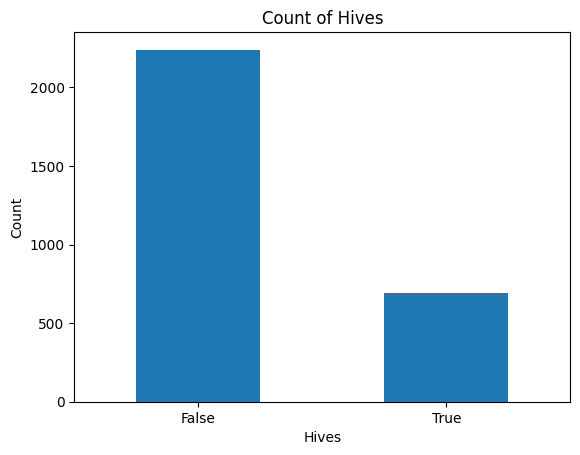

In [ ]:
# Plot count of Hives
df5['Hives'].value_counts().plot(kind='bar')
plt.title('Count of Hives')
plt.xlabel('Hives')
plt.ylabel('Count')
plt.xticks([0, 1], ['False', 'True'], rotation=0)
plt.show()

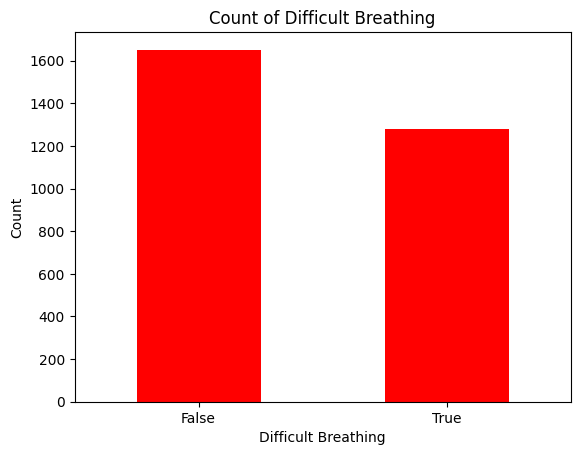

In [ ]:
df5['Difficult Breathing'].value_counts().plot(kind='bar',color="red")
plt.title('Count of Difficult Breathing')
plt.xlabel('Difficult Breathing')
plt.ylabel('Count')
plt.xticks([0, 1], ['False','True'], rotation=0)
plt.show()

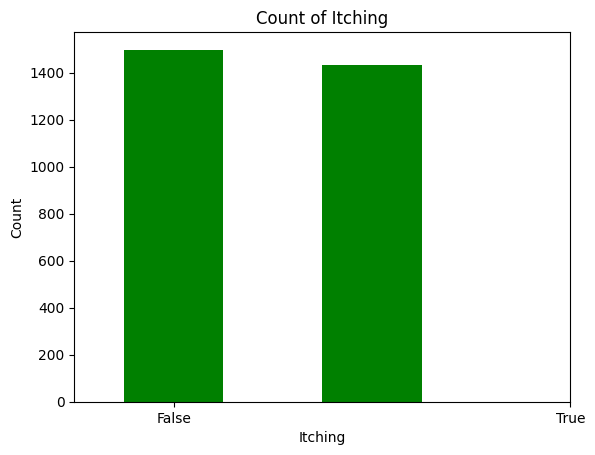

In [ ]:
df5['Itching'].value_counts().plot(kind='bar',color='green')
plt.title('Count of Itching')
plt.xlabel('Itching')
plt.ylabel('Count')
plt.xticks([0, 2], ['False', 'True'], rotation=0)
plt.show()

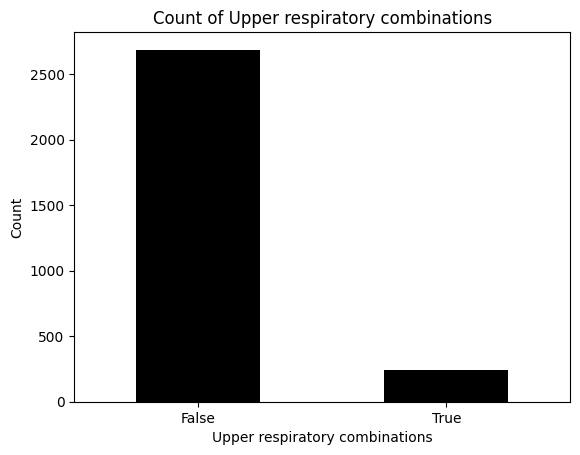

In [ ]:
df5['Upper respiratory combinations'].value_counts().plot(kind='bar',color='black')
plt.title('Count of Upper respiratory combinations')
plt.xlabel('Upper respiratory combinations')
plt.ylabel('Count')
plt.xticks([0, 1], ['False', 'True'], rotation=0)
plt.show()

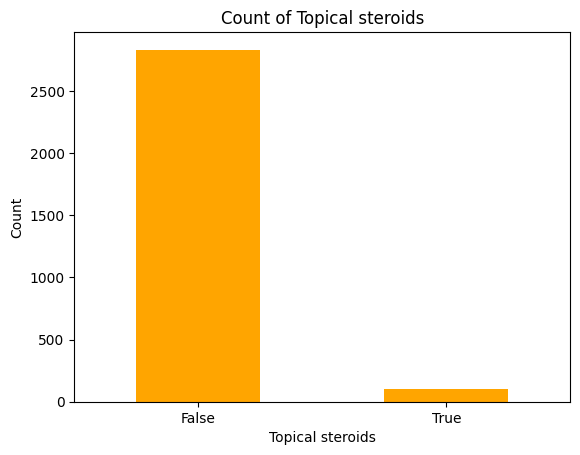

In [ ]:
df5['Topical steroids'].value_counts().plot(kind='bar',color='orange')
plt.title('Count of Topical steroids')
plt.xlabel('Topical steroids')
plt.ylabel('Count')
plt.xticks([0, 1], ['False', 'True'], rotation=0)
plt.show()